## 3.3.3 (부록) QuantileTransformer와 PowerTransformer

QuantileTransformer

1000개의 분위를 사용하여 데이터를 균등하게 분포시키며 RobustScaler와 비슷하게 이상치에 민감하지 않으며 전체 데이터를 0과 1 사이로 압축한다

실제로 적용하고 산점도 그리기

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

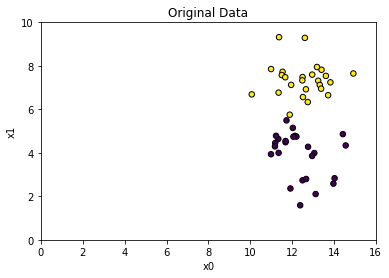

In [2]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

랜덤하게 흩어져있던 데이터 포인트들이 0과 1 사이에 고르게 분포되는 것을 볼 수 있다.

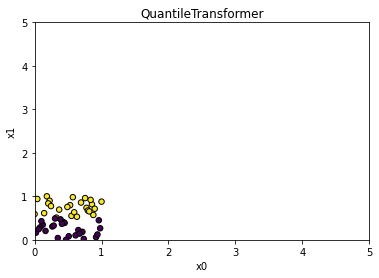

In [3]:
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

아래와 같이 데이터의 히스토그램을 보면 얼마나 균등하게 분포되었는지 확인 할 수 있다.

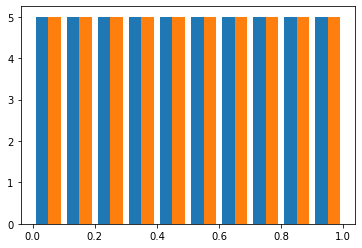

In [4]:
plt.hist(X_trans)
plt.show()

QuantilesTransformer의 분위 수는 'n_quantiles' 매개변수에서 설정 할 수 있다.
scaler 객체의 quantiles_ 속성에는 특성별로 계산된 분위 값이 들어 있으므로 이 속성의 크기는 (n_quantiles, n_features)이다.

In [7]:
print(scaler.quantiles_.shape)
#기본 값이 바뀐건가..

(50, 2)


간단한 데이터 샘플 만들기

하나의 특성 다섯개의 샘플

np.percentile() 두 번째 매개변수에서 지정한 분위에 해당하는 데이터 추출 후 반환

In [8]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]


In [9]:
#위처럼 잘 되는 것을 확인 후 적용
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


QuantileTransformer의 'output_distribution' 매개변수에서 normal로 지정하여 균등 분포가 아닌 정규분포로 출력 변환

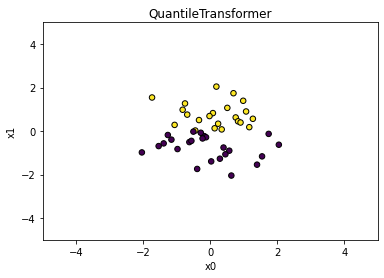

In [10]:
scaler = QuantileTransformer(n_quantiles=50, output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

데이터의 특성별로 정규분포 형태에 가깝도록 변환해주는 PowerTransformer가 추가됨.

method 매개변수에 'yeo-johnson'과 'box-cox' 알고리즘을 지정할 수 있음. 기본값은 전자이다.

QuantileTransformer와 StandardScaler, PowerTransformer의 두 알고리즘이 예제 데이터셋을 정규분포로 변환하는 차이를 확인해보자.

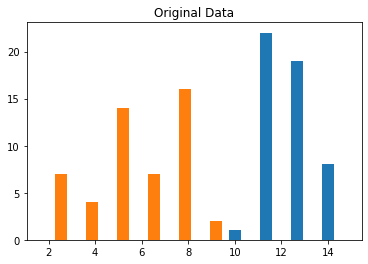

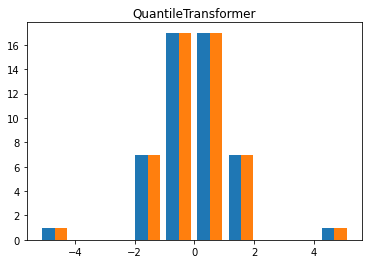

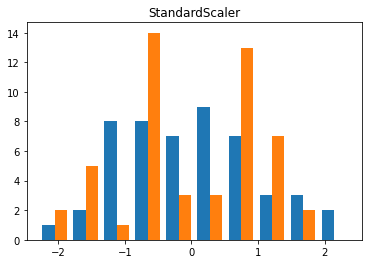

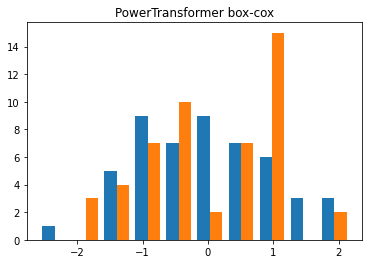

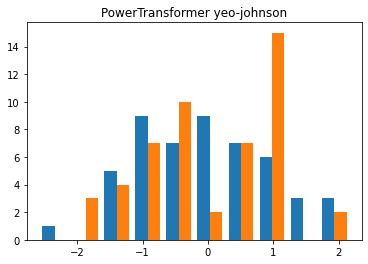

In [11]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(n_quantiles=50, output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

여기선 PowerTransformer의 두 알고리즘이 동일한 결과가 나옴.

실전에서는 각각 다를 수 있으므로 각 변환기의 결과를 히스토그램으로 확인해보는 것이 좋다.